# Exploratory Data Analysis (EDA) of Toyota Stock Dataset  

In this analysis, we will explore the **Toyota Stock Dataset (1980-2024)** sourced from [Kaggle](https://www.kaggle.com/datasets/mhassansaboor/toyota-motors-stock-data-2980-2024). This dataset provides daily stock trading data for **Toyota Motor Corporation (ticker: TM)**, covering over four decades of market activity.  

Our goal is to conduct an **Exploratory Data Analysis (EDA)** to uncover trends, detect potential anomalies, and prepare the data for further financial analysis or predictive modeling.  

We will analyze key stock metrics such as **adjusted closing prices, opening/closing prices, highs, lows, and trading volumes**.

Let's dive into the data and uncover insights into Toyota's historical stock performance! 🚀

## Import Libraries

Let's import some libraries to get started!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

Let's start by reading in the Toyota_Data.csv file into a pandas dataframe.

In [2]:
df = pd.read_csv("Toyota_Data.csv")

df.head(21)  

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409
5,1980-03-24,2.371490,3.398259,3.451775,3.398259,0.000000,2803
6,1980-03-25,2.352816,3.371501,3.425017,3.371501,0.000000,27095
7,1980-03-26,2.352816,3.371501,3.425017,3.371501,0.000000,1869
8,1980-03-27,2.324807,3.331364,3.384880,3.331364,0.000000,14015
9,1980-03-28,2.315470,3.317985,3.371501,3.317985,0.000000,36438


## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [3]:
df.isnull()

,Date,Adj Close,Close,High,Low,Open,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
11286,False,False,False,False,False,False,False
11287,False,False,False,False,False,False,False
11288,False,False,False,False,False,False,False
11289,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Approximately **0%** of the data is missing, indicating a complete dataset with no null values. Since there are no missing values, we don’t need to perform imputation. However, checking the `Volume` column, we notice some values are `0`. This could indicate days with no stock trading activity rather than missing data. We may need to investigate further to determine if these zeros should be treated as valid data points or handled differently.

In [5]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04
mean,63.586275,72.057776,72.478879,71.646418,67.955424,2.146604e+05
std,52.272225,51.295776,51.552662,50.976716,55.851523,3.874256e+05
min,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04
50%,50.583900,66.040001,66.650002,65.440002,66.000000,9.100000e+04
75%,104.705669,114.295002,114.895000,113.625000,114.294998,2.923000e+05
max,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07


# Descriptive Statistical Analysis - `df.describe()`

In this section, we performed a descriptive statistical analysis using the `df.describe()` method, which provides a summary of key statistical metrics for the numerical columns in the dataset.

## Summary of Results:
- **Count (`count`)**: All columns contain 11,291 records, indicating no missing values.
- **Mean (`mean`)**: Represents the average value of each variable, useful for understanding central tendencies.
- **Standard Deviation (`std`)**: Measures data dispersion relative to the mean. Higher values indicate greater variability.
- **Minimum (`min`) and Maximum (`max`)**: Define the observed value range for each variable.
- **Quartiles (`25%`, `50%`, `75%`)**: Show data distribution percentiles, helping to understand median and spread.

## Observations:
- The `Open` column has minimum values of `0.000000`, which may indicate missing or inconsistent records.
- The `Volume` column exhibits significant variation, suggesting the presence of outliers or periods of high activity.
- Large differences between the mean and median in some columns may indicate skewed distributions.

To further analyze the dataset, we can explore histograms, boxplots, and compute skewness and kurtosis to better understand data distribution.

<Figure size 1200x600 with 0 Axes>

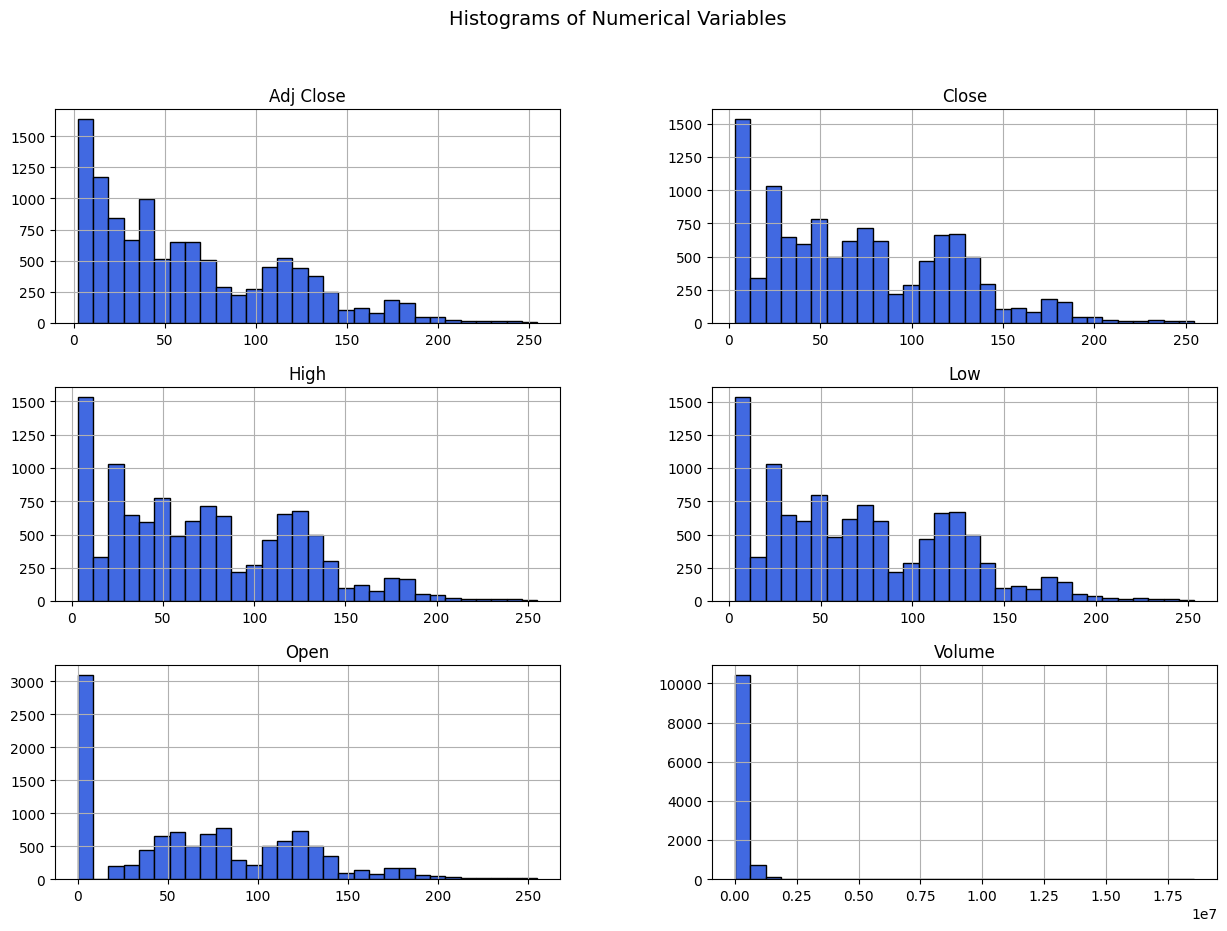

In [6]:
plt.figure(figsize=(12, 6))

df.hist(bins=30, figsize=(15, 10), color='royalblue', edgecolor='black')

plt.suptitle("Histograms of Numerical Variables", fontsize=14)
plt.show()


The histograms provide insights into the distribution of numerical variables in the dataset. Most variables exhibit a right-skewed distribution, indicating that lower values are more frequent, with a few high-value outliers. The `Volume` variable, in particular, shows a significant concentration near zero, suggesting periods of low trading activity. Meanwhile, `Open`, `Close`, `High`, and `Low` prices follow a similar pattern, highlighting possible volatility in stock prices. These distributions suggest potential data transformations, such as log scaling, to better visualize trends and reduce skewness.

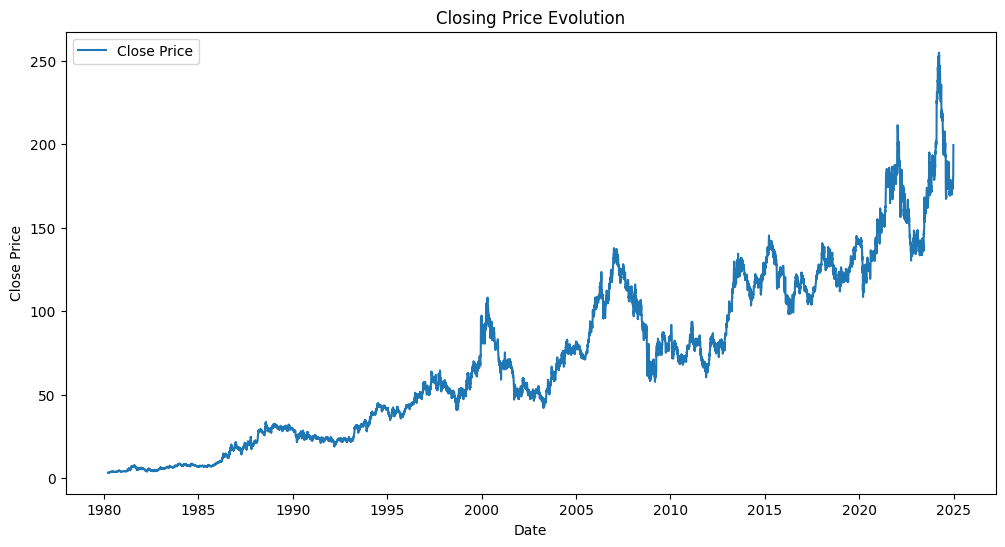

In [20]:
plt.figure(figsize=(12,6))

df['Date'] = pd.to_datetime(df['Date'])  

plt.plot(df['Date'], df['Close'], label='Close Price')

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Closing Price Evolution")

plt.legend()
plt.show()

#### **Traded Volume Over Time**  

The chart illustrates the **traded stock volume** over time, highlighting significant fluctuations in market activity. Peaks in volume are visible during certain periods, indicating moments of increased trading, which may be associated with major market events or economic shifts. The overall trend shows a growth in traded volume over the years, reflecting a rise in investor participation and market liquidity.

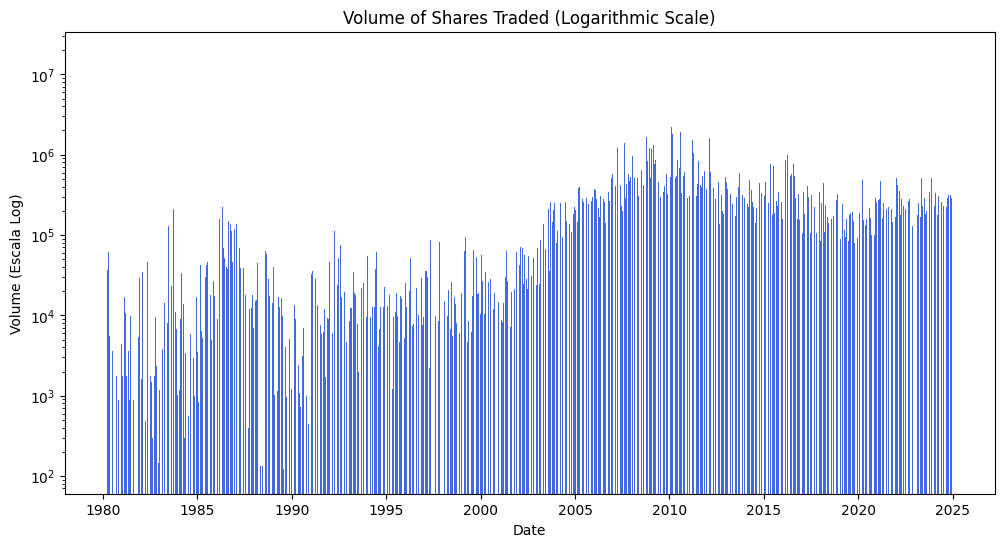

In [21]:
plt.figure(figsize=(12,6))

plt.bar(df['Date'], df['Volume'], color='royalblue')

plt.yscale('log')
plt.xlabel("Date")
plt.ylabel("Volume (Escala Log)")
plt.title("Volume of Shares Traded (Logarithmic Scale)")

plt.show()

#### **Line Chart for Temporal Evolution (Traded Stock Volume)**  

The chart shows the evolution of the **traded stock volume** over time, using a logarithmic scale on the Y-axis to better visualize large variations in the data. A significant increase in volume can be observed starting in the 2000s, with notable peaks between 2005 and 2010. After this period, the volume stabilizes at higher levels, indicating a general increase in market liquidity over time.

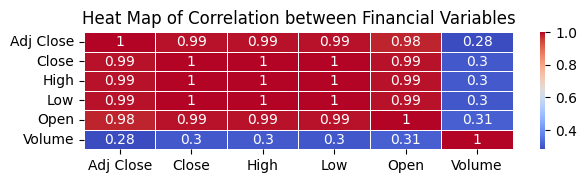

In [15]:
plt.subplot(3, 1, 3)
corr_matrix = df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heat Map of Correlation between Financial Variables')

plt.tight_layout()
plt.show()

### **Heatmap of Correlation Between Financial Variables**

The heatmap illustrates the correlation between key financial variables. Strong positive correlations are evident among price-related features, such as Close, Open, High, Low, and Adj Close, all showing values close to 1, indicating they tend to move together. In contrast, Volume demonstrates a weak correlation with price variables, with coefficients ranging from 0.28 to 0.31, suggesting that trading volume does not directly influence price movements in this dataset. This analysis helps identify strongly related variables, which is valuable for feature selection and reducing multicollinearity in predictive models.

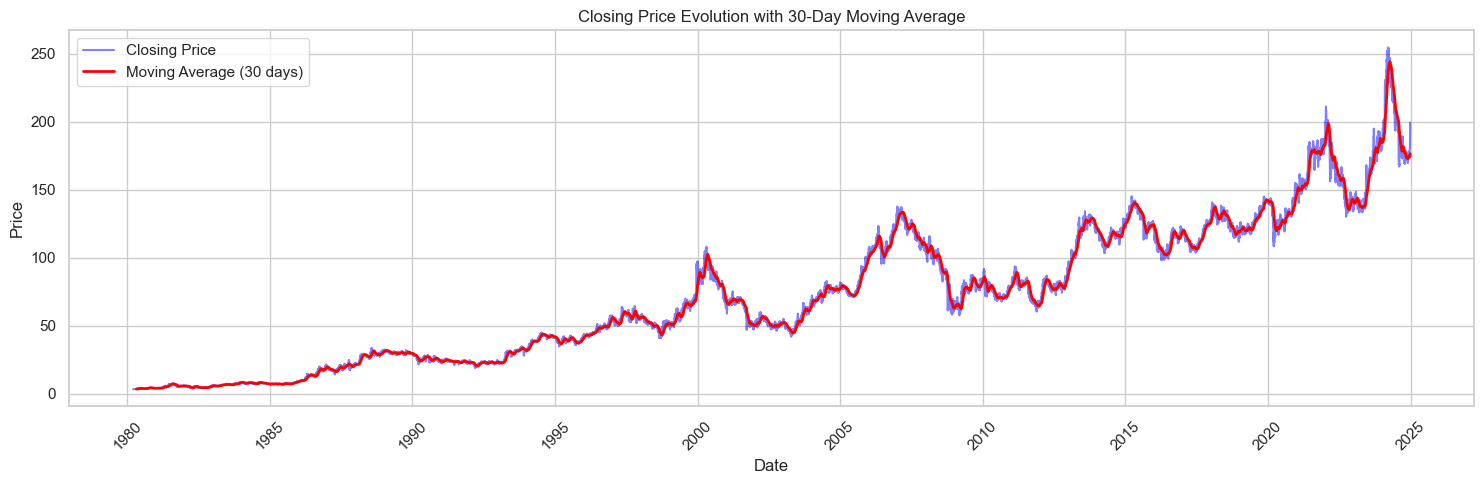

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

df['Rolling_Avg'] = df['Close'].rolling(window=30).mean()

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.5, color='blue')
plt.plot(df['Date'], df['Rolling_Avg'], label='Moving Average (30 days)', color='red', linewidth=2)

plt.title('Closing Price Evolution with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### **Closing Price Evolution with 30-Day Moving Average**  
This time series chart shows the evolution of the closing price over the years, with a 30-day moving average applied to smooth out daily fluctuations. The visualization highlights cycles of growth and decline, emphasizing long-term trends and periods of higher volatility. The moving average helps identify patterns of market growth or corrections, providing valuable insights for strategic buy or sell decisions. Recent peaks may indicate potential opportunities or risks for investors, making this chart essential for deeper analyses of price behavior over time.

Text(0, 0.5, 'Volume')

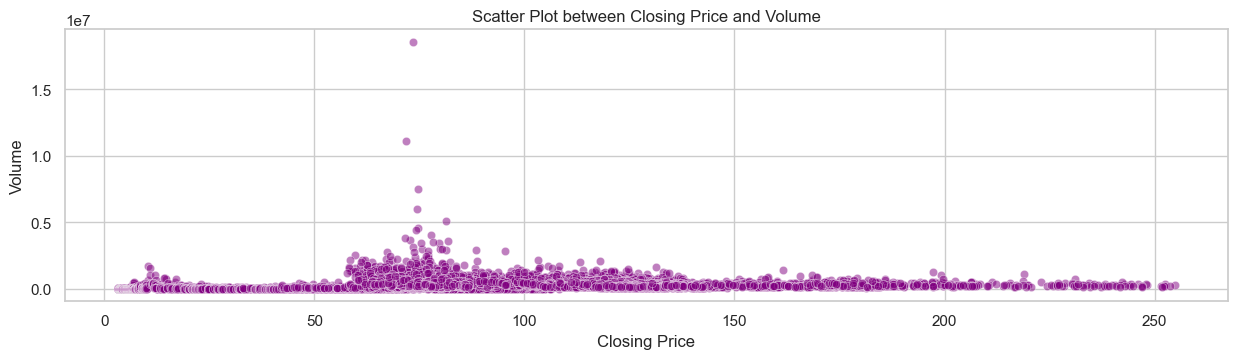

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 2)
sns.scatterplot(x='Close', y='Volume', data=df, alpha=0.5, color='purple')
plt.title('Scatter Plot between Closing Price and Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')

### **Scatter Plot between Closing Price and Volume**  
The scatter plot explores the relationship between the closing price and traded volume. Most data points are concentrated in areas with low volume and moderate prices (below 150), with a few exceptions where higher volumes occur at lower prices. However, there is no clear correlation between traded volume and the closing price. This suggests that volume spikes are not directly linked to significant price changes and that other external factors, such as economic events or corporate announcements, may be influencing trading activity.

# 📌 Final Conclusion of the EDA - Toyota Stock Analysis

The exploratory data analysis of Toyota's stock revealed important trends in the behavior of closing prices and trading volume over time. We observed a significant upward trend in closing prices in recent years, with periods of pronounced volatility. The 30-day moving average helped smooth out these fluctuations, highlighting valuation cycles and market corrections.

Additionally, the scatter plot analysis between closing price and volume suggests that periods of high liquidity are associated with price peaks, indicating possible speculative movements or external events impacting stock trading. The correlation between variables reinforces the relationship between price and volume, suggesting that large investor movements directly influence price behavior.

To deepen the analysis, future investigations could include macroeconomic factors, specific events that impacted the company, and predictive modeling to forecast price trends. This study provides a solid foundation for strategic decision-making in the financial market and more advanced future analyses.